In [334]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [335]:
#reading the dataset
u = "http://bit.ly/w-data"
data = pd.read_csv(u)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [336]:
#assinging the x attribute 
x=data[['Hours']].values

print(x)



[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [337]:
#assigning the y attribute
y=data[['Scores']].values
print(y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


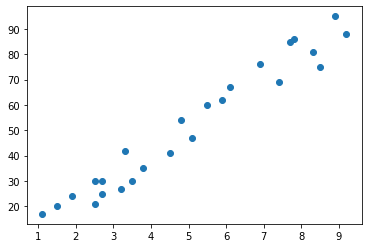

In [338]:
plt.scatter(x,y)

In [339]:
#splitting into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.4,random_state=0) 

In [340]:
#training model
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

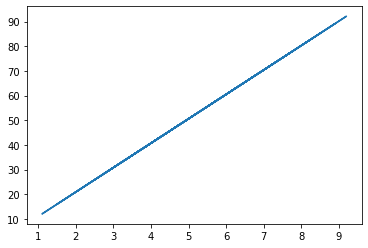

In [341]:
#plotting a regression line we do
Y=reg.coef_*x+reg.intercept_
plt.plot(x,Y)


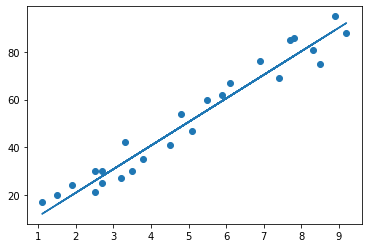

In [342]:
#to view the scatter plots we along with regression line we do
plt.scatter(x,y)
plt.plot(x,Y)

In [343]:
#predicting the value we do
y_pred=reg.predict(X_test)


In [344]:
#converting y_pred from 2D data to 1D
y_pred=np.array(y_pred)
y_pr=y_pred.flatten()
print(y_pr)

[15.9477618  32.77394723 74.344523   25.84551793 59.49788879 38.71260091
 19.90686425 78.30362545 69.39564493 11.98865934]


In [345]:
#converting y_test from 2D data to 1D
y_test=np.array(y_test)
y_te=y_test.flatten()
print(y_te)

[20 27 69 30 62 35 24 86 76 17]


In [346]:
#showing the comparison between predicted value and actual value
df = pd.DataFrame({'Actual': y_te, 'Predicted': y_pr})  
df 

,Actual,Predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


In [347]:
#predicting for 9.25 hours
hours = 9.25
score_pred = reg.predict([[hours]])
score_pred=np.array(score_pred)
score_pred=score_pred.flatten()
df = pd.DataFrame({'hours': hours, 'Predicted': score_pred}) 
df




,hours,Predicted
0,9.25,92.655372


In [348]:
#calculating the accuracy of regression 
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 4.89
Mean squared error = 26.03
Median absolute error = 4.58
Explain variance score = 0.96
R2 score = 0.96
